In [2]:
pip install matplotlib seaborn python-ternary


Note: you may need to restart the kernel to use updated packages.


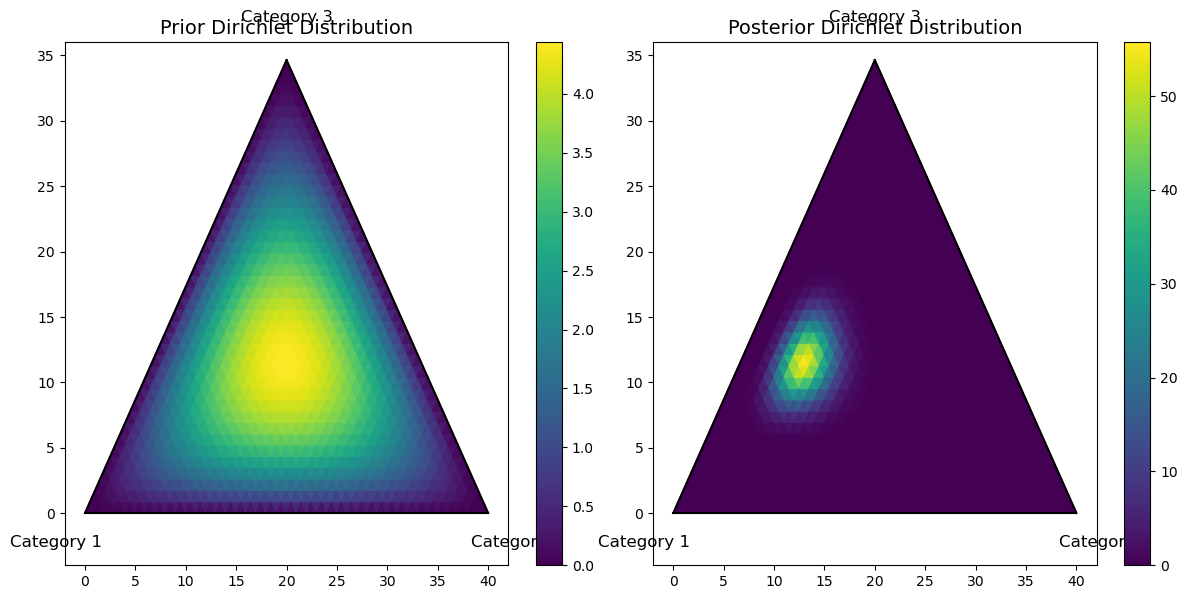

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ternary

np.random.seed(42)

alpha_prior = [2, 2, 2]
alpha_posterior = [10, 20, 30]

scale = 40

def dirichlet_pdf(x, alpha):
    """Compute the Dirichlet PDF for a given point x and concentration parameters alpha."""
    coeff = np.math.gamma(np.sum(alpha)) / np.prod([np.math.gamma(a) for a in alpha])
    return coeff * np.prod([xi**(ai - 1) for xi, ai in zip(x, alpha)])

# Heat Map
def generate_dirichlet_heatmap(alpha, scale):
    """Generate a heatmap for a Dirichlet distribution."""
    heatmap = {}
    for i in range(scale + 1):
        for j in range(scale + 1 - i):
            k = scale - i - j
            x = [i / scale, j / scale, k / scale]
            heatmap[(i, j)] = dirichlet_pdf(x, alpha)
    return heatmap

prior_heatmap = generate_dirichlet_heatmap(alpha_prior, scale)
posterior_heatmap = generate_dirichlet_heatmap(alpha_posterior, scale)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot prior
ax = axes[0]
figure, tax = ternary.figure(ax=ax, scale=scale)
tax.heatmap(prior_heatmap, scale=scale, cmap="viridis", colorbar=True)
tax.boundary()
tax.set_title("Prior Dirichlet Distribution", fontsize=14)
tax.left_corner_label("Category 1", fontsize=12)
tax.right_corner_label("Category 2", fontsize=12)
tax.top_corner_label("Category 3", fontsize=12)

# Plot posterior
ax = axes[1]
figure, tax = ternary.figure(ax=ax, scale=scale)
tax.heatmap(posterior_heatmap, scale=scale, cmap="viridis", colorbar=True)
tax.boundary()
tax.set_title("Posterior Dirichlet Distribution", fontsize=14)
tax.left_corner_label("Category 1", fontsize=12)
tax.right_corner_label("Category 2", fontsize=12)
tax.top_corner_label("Category 3", fontsize=12)

# Show the plots
plt.tight_layout()
plt.savefig("dirichlet_density_plots.png", dpi=300)
plt.show()
